### **Pembelajaran Mesin H**
### **Rakha Fathin Izzan Consetta / 502522156**
### **Tugas K-Means Clustering**


Tugas Individu: Mengerjakan Hands Lab dari K-Means Clustering pada Machine Learning with Python | Cognitive Class.
1. Kelompokkan data sintetik hasil generate secara random, jika jumlah cluster adalah 2 dan 3.
2. Selesaikan permasalahan dataset penjualan mobil menggunakan K-Means Clustering, lalu analisis hasil clustering. Silakan Anda juga bisa melakukan EDA (Exploratory Data Analysis) maupun data preprocessing sesuai kebutuhan.
 
Link Dataset: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data

#### **1. Menggunakan data random sama dengan pada Lab K-Means pada Cognitive Class ML, akan dilakukan K-Means Clustering dengan jumlah cluster 2 dan 3**

Import Library

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

Membuat data random dengan seed 0

In [3]:
np.random.seed(0)

Membuat cluster random dengan 5000 titik, center [[4, 4], [-2, -1], [2, -3],[1,1]], dan standar deviasi cluter sebesar 0.9

Maka akan dihasilkan X, y yang merupakan array of shape

In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display scatter plot data yang telah dibuat

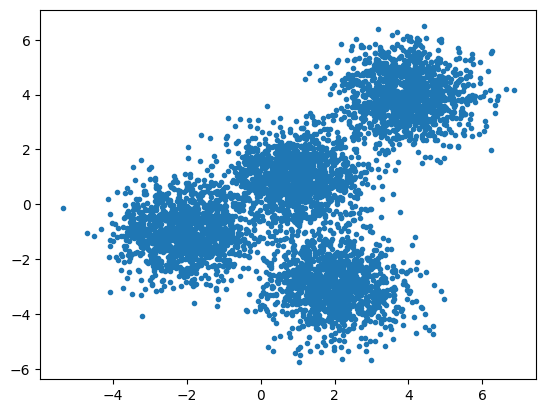

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

**Mengimplementasikan K-Means**

init: "k-means++", yang akan memilih cluster secara cerdas untuk mempercepat konvergensi.

n_clusters: 3 dan 2 (sesuai dengan soal), yang akan menentukan jumlah cluster.

n_init: 12, berapa kali k-means akan dijalankan dengan centroid awal yang berbeda, untuk menghasilkan output yang terbaik.

In [6]:
k_means = KMeans(init="k-means++", 
                 n_clusters=3, 
                 n_init=12)

In [7]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

Mengambil label untuk setiap poin dan koordinat titik tengah cluster 

In [8]:
k_means_labels = k_means.labels_

k_means_centers = k_means.cluster_centers_


**Membuat Visual Plot**

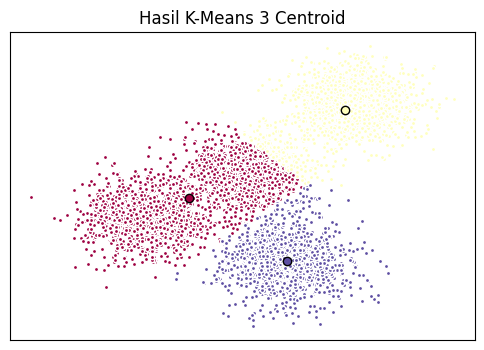

In [9]:
# Inisialisasi plot dengan dimensi yang ditentukan.
fig = plt.figure(figsize=(6, 4))

# Colors menggunakan peta warna, yang akan menghasilkan array warna berdasarkan
# jumlah label yang ada. Kami menggunakan set(k_means_labels) untuk mendapatkan
# label unik.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Buat plot
ax = fig.add_subplot(1, 1, 1)

# Loop for yang memplot titik data dan centroid.
# k akan berjalan dari 0-3, yang akan sesuai dengan cluster yang mungkin dari masing-masing
# titik data.
for k, col in zip(range(3), colors):

    # Buat daftar semua titik data, di mana titik data yang berada dalam
    # dalam cluster (mis. cluster 0) diberi label sebagai true, jika tidak diberi label sebagai false.
    my_members = (k_means_labels == k)
    
    # Tentukan centroid, atau pusat cluster.
    cluster_center = k_means_centers[k]
    
    # Plot titik data dengan warna col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plot centroid dengan warna yang ditentukan, tetapi dengan kontur yang lebih gelap
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Judul plot
ax.set_title('Hasil K-Means 3 Centroid')

# Hapus tanda centang sumbu x
ax.set_xticks(())

# Hapus tanda centang sumbu y
ax.set_yticks(())

# Tampilkan plot
plt.show()


**Untuk 2 Centroid:**

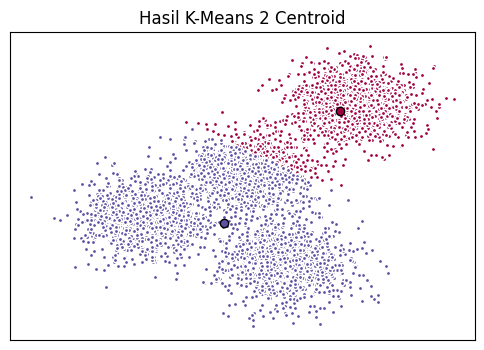

In [10]:
# Implementasi K-Means

k_means = KMeans(init="k-means++", 
                 n_clusters=2, 
                 n_init=12)
k_means.fit(X)


# Ambil atribut yang diperlukan

k_means_labels = k_means.labels_
k_means_centers = k_means.cluster_centers_


#Visualisasi Hasil K-Means

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(2), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('Hasil K-Means 2 Centroid')
ax.set_xticks(())
ax.set_yticks(())

plt.show()


### **2. Menggunakan dataset "Vehicle Sales Data", dilakukan data preprocessing, EDA, dan K-Means Clustering, lalu analisis hasil K-Means**

#### **Read Data**

In [11]:
df = pd.read_csv('car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### **Assessing Data**

Menampilkan semua kolom, jumlah non null valuenya, serta data typenya

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Melakukan operasi statistika pada nilai numerik dan non-numerik

In [13]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


Menghitung jumlah data yang null pada setiap kolom

In [14]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Menghitung data yang merupakan duplikat dari row sebelumnya

In [15]:
df.duplicated().sum()

0

**Penjelasan Mengenai Atribut Data**

Data Numerical:
1. Year: Tahun pembuatan kendaraan 
2. Condition: Representasi numerik dari kondisi kendaraan 
3. Odometer: Jarak tempuh atau jarak yang ditempuh oleh kendaraan
4. MMR: Laporan Pasar Manheim, alat penetapan harga yang digunakan dalam industri otomotif
5. Selling Price: Harga jual kendaraan

Data Categorical:
1. Make: Merek atau produsen kendaraan
2. Model: Model spesifik kendaraan 
3. Trim: Penunjukan tambahan untuk versi atau paket opsi tertentu dari model
4. Body: Jenis badan kendaraan
5. Transmission: Jenis transmisi dalam kendaraan
6. VIN: Nomor Identifikasi Kendaraan, kode unik yang digunakan untuk mengidentifikasi kendaraan bermotor individu
7. State: Negara bagian di mana kendaraan berada atau terdaftar 
8. Color: Warna eksterior kendaraan
9. Interior: Warna interior kendaraan
10. Seller: Entitas atau perusahaan yang menjual kendaraan 
11. Sale Date: Tanggal dan waktu ketika kendaraan dijual

>
**Masalah yang Terdapat pada Data:**

1. Banyak kolom, numerical maupun kategorical, yang memiliki null value.
2. Beberapa kolom atau atribut yang tidak terlalu penting atau tidak akan digunakan dalam EDA dan K-Means Clustering


### **Data Cleaning**

**Drop kolom yang tidak diperlukan**

Setelah dilakukan analisis, kolom Model, Trim, Transmission, VIN, Interior, Sale Date tidak akan terlalu diperhatikan dalam EDA dan perhitungan k-means

In [16]:
df = df.drop(['model', 'trim', 'transmission', 'vin', 'interior', 'saledate'], axis=1)


**Menangani null value pada kolom numerical**

Pertama kita cek visualisasi data untuk menentukan apakah kita harus menggunakan mean atau median

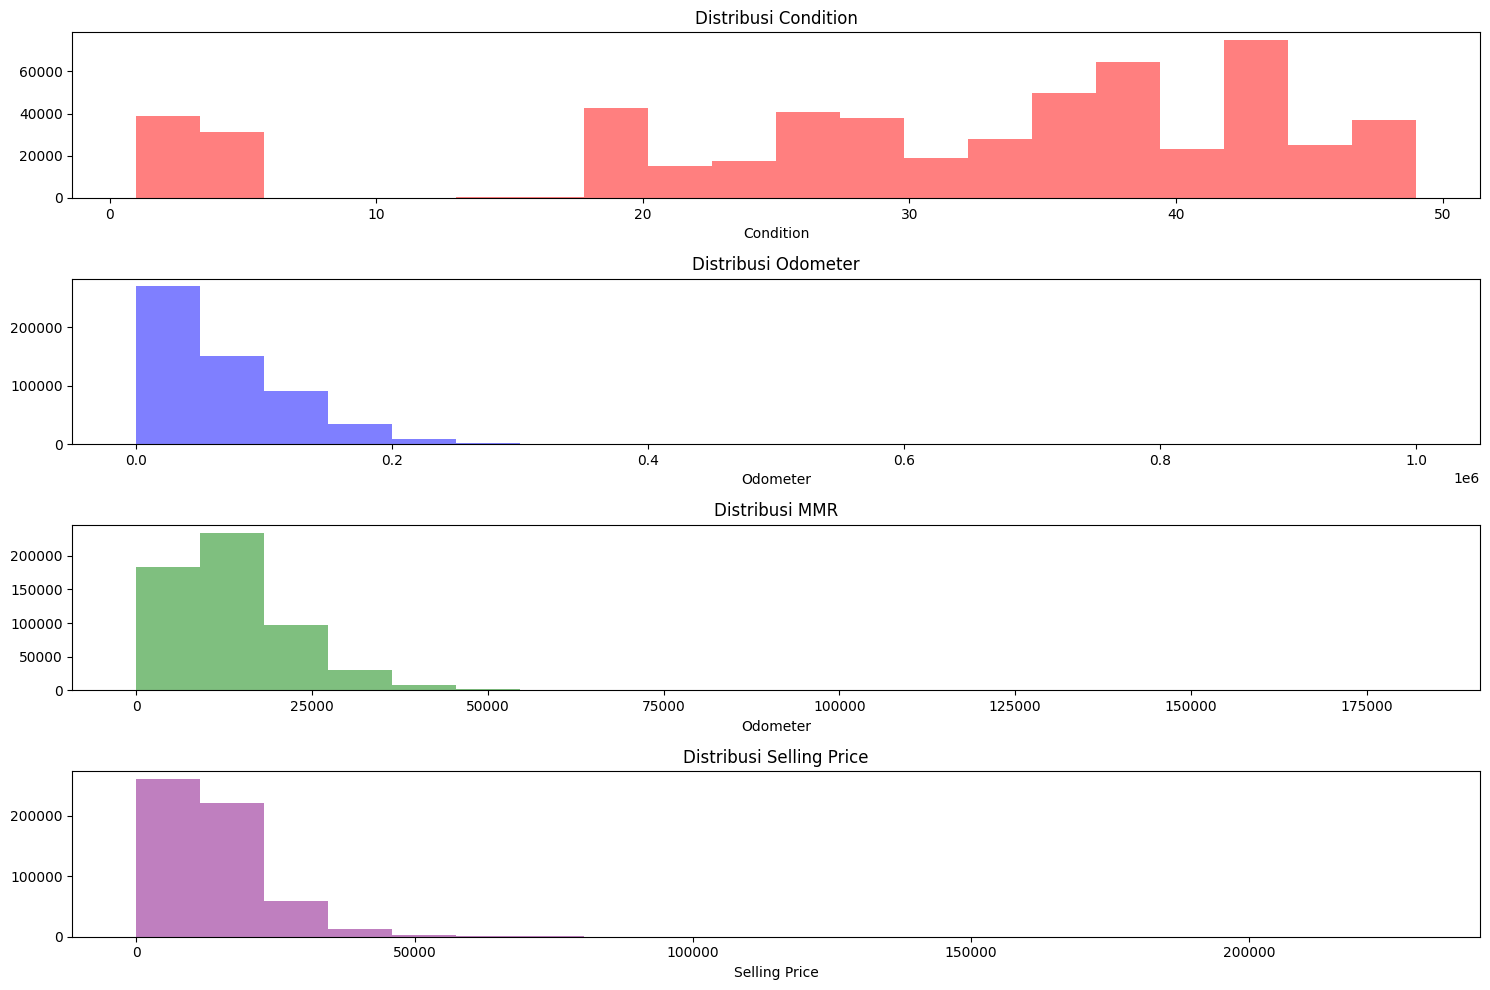

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Condition')
plt.xlabel('Condition')

plt.subplot(4, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi Odometer')
plt.xlabel('Odometer')

plt.subplot(4, 1, 3)
plt.hist(df['mmr'].dropna(), bins=20, color='green', alpha=0.5)
plt.title('Distribusi MMR')
plt.xlabel('Odometer')

plt.subplot(4, 1, 4)
plt.hist(df['sellingprice'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Selling Price')
plt.xlabel('Selling Price')

plt.tight_layout()
plt.show()

Karena Condition datanya lebih tersebar, maka null values diisi dengan median. Sedangkan odometer, mmr, dan selling price diisi dengan mean.

In [18]:
df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].mean(), inplace=True)

**Menangani null value pada kolom categorical**

Hal ini dapat dilakukan salah satunya dengan mengisinya dengan kategori placeholder, seperti 'Other' 

In [19]:
df['make'].fillna('Other', inplace=True)
df['body'].fillna('Other', inplace=True)
df['color'].fillna('Other', inplace=True)


In [20]:
df.isnull().sum()

year            0
make            0
body            0
state           0
condition       0
odometer        0
color           0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [21]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,558837.000000,558837.000000,558837.000000,558837.000000
mean,2010.038927,30.763899,68320.017767,13769.377495,13611.358810
std,3.966864,13.274944,53394.051633,9679.638057,9749.396951
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28375.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52266.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99103.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


**Scatter Matrix**

Untuk mengetahui korelasi antar semua kombinasi data numerik

In [22]:
numeric_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

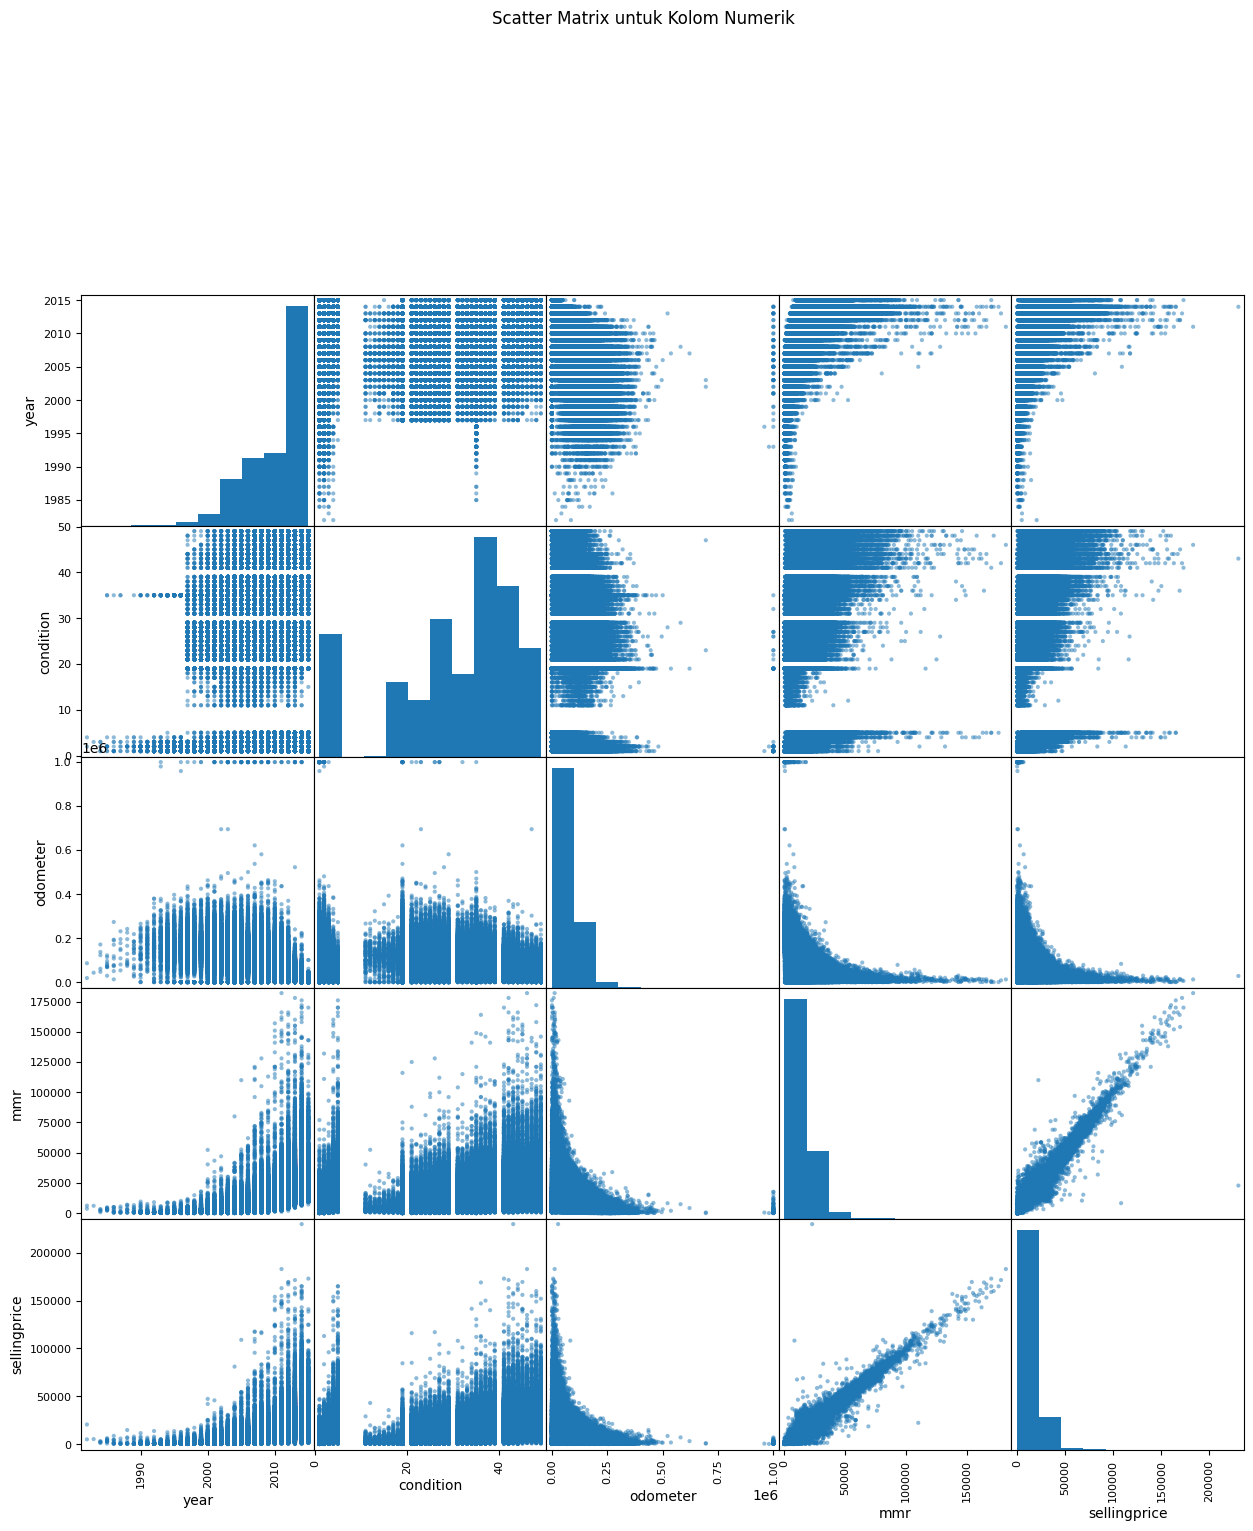

In [23]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[numeric_columns], alpha=0.5, figsize=(15, 15), diagonal='hist')
plt.suptitle('Scatter Matrix untuk Kolom Numerik', y=1.07)
plt.show()

In [24]:
df.shape

(558837, 10)

Dapat diperhatikan pada scatter matrix bawha banyak data outlier, maka akan dilakukan penanganan outlier dengan z-score

In [25]:
from scipy import stats

z_scores = stats.zscore(df[numeric_columns])
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.shape

(534360, 10)

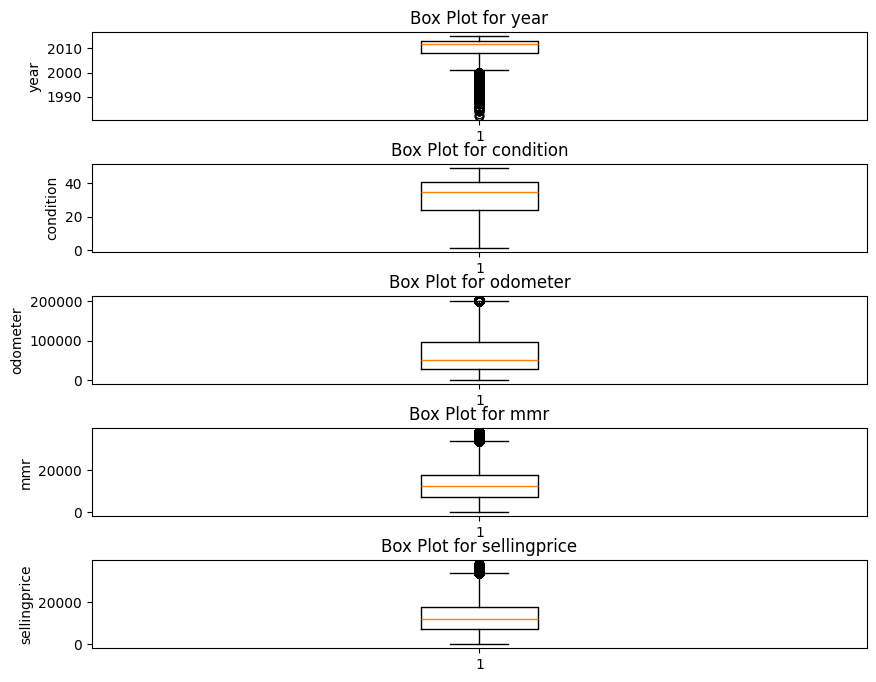

In [26]:

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(clean_df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

In [27]:
df = clean_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534360 entries, 0 to 558836
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534360 non-null  int64  
 1   make          534360 non-null  object 
 2   body          534360 non-null  object 
 3   state         534360 non-null  object 
 4   condition     534360 non-null  float64
 5   odometer      534360 non-null  float64
 6   color         534360 non-null  object 
 7   seller        534360 non-null  object 
 8   mmr           534360 non-null  float64
 9   sellingprice  534360 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 44.8+ MB


### **Exploratory Data Analysis**

**1. Feature Understanding**

Feature understanding adalah proses memahami variabel atau fitur (features) yang ada dalam dataset. Ini melibatkan pemahaman mendalam tentang setiap variabel, termasuk karakteristik, makna, dan pengaruhnya terhadap fenomena yang diamati.

Membandingkan tahun dibuat dengan kilometer yang telah ditempuh

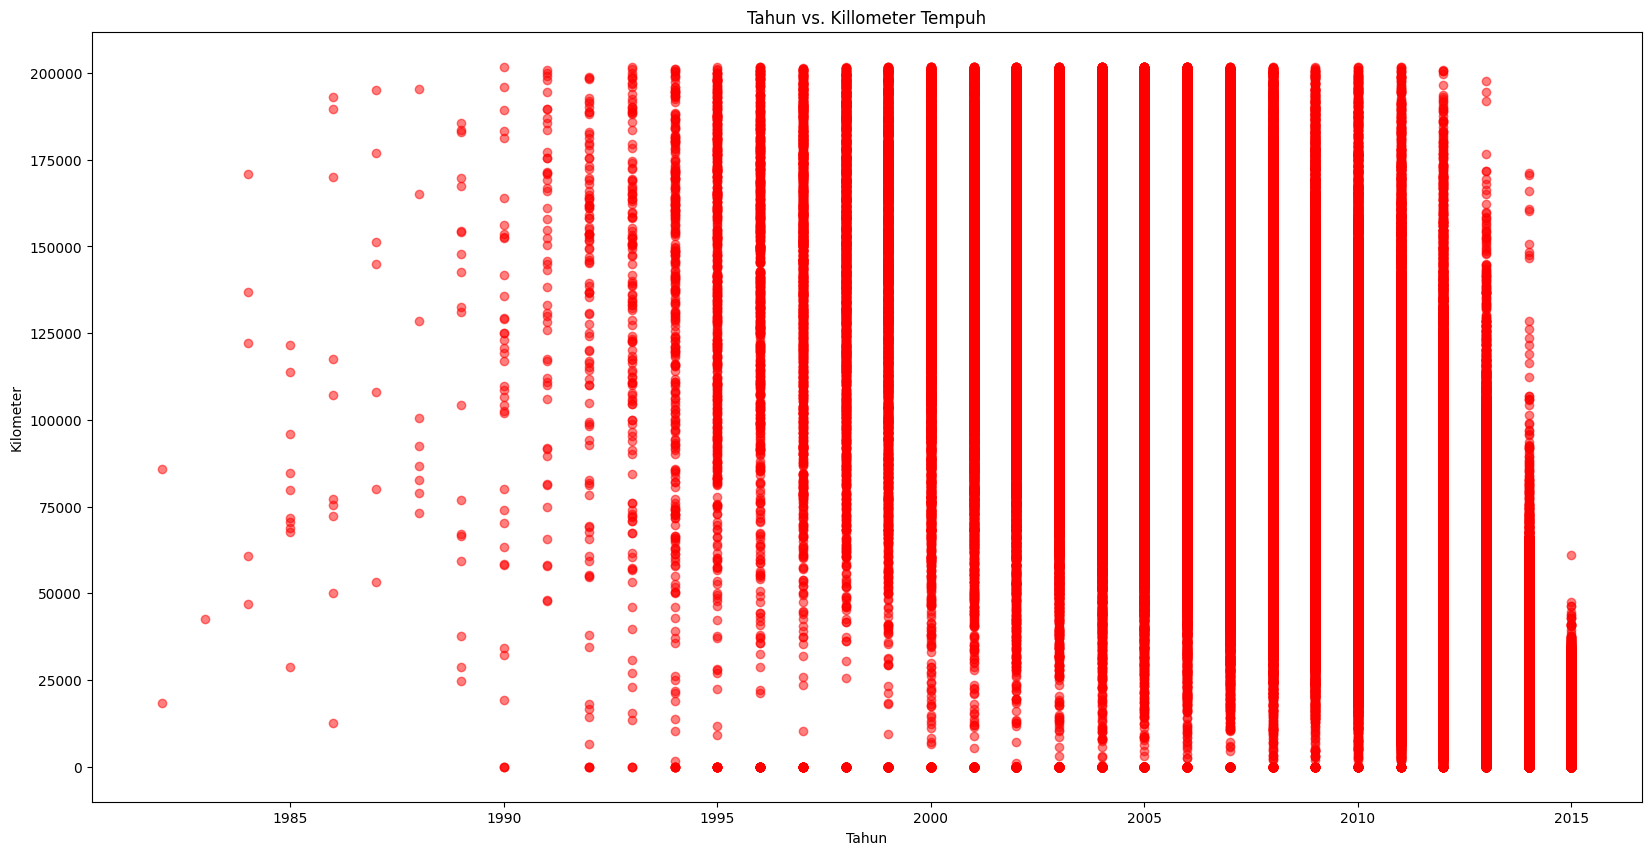

In [28]:
plt.figure(figsize=(20, 10))

plt.scatter(df['year'], df['odometer'], alpha=0.5, c='red')
plt.title('Tahun vs. Killometer Tempuh')
plt.xlabel('Tahun')
plt.ylabel('Kilometer')
plt.show()

Membandingkan MMR mobil dengan harga jual

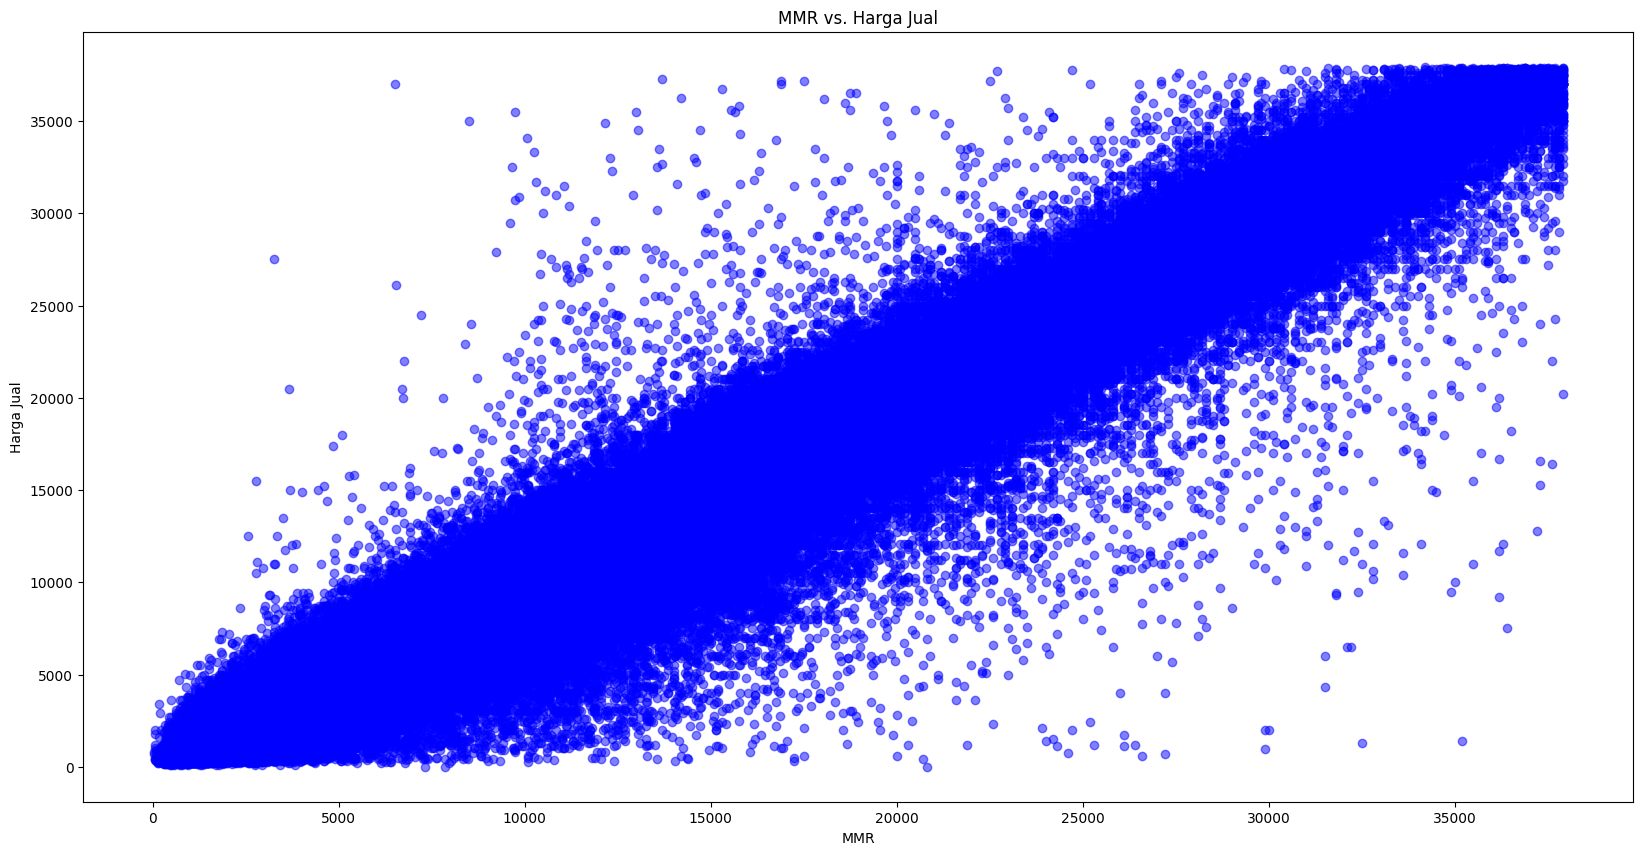

In [29]:
plt.figure(figsize=(20, 10))

plt.scatter(df['mmr'], df['sellingprice'], alpha=0.5, c='blue')
plt.title('MMR vs. Harga Jual')
plt.xlabel('MMR')
plt.ylabel('Harga Jual')
plt.show()

Distribusi mobil berdasarkan merek

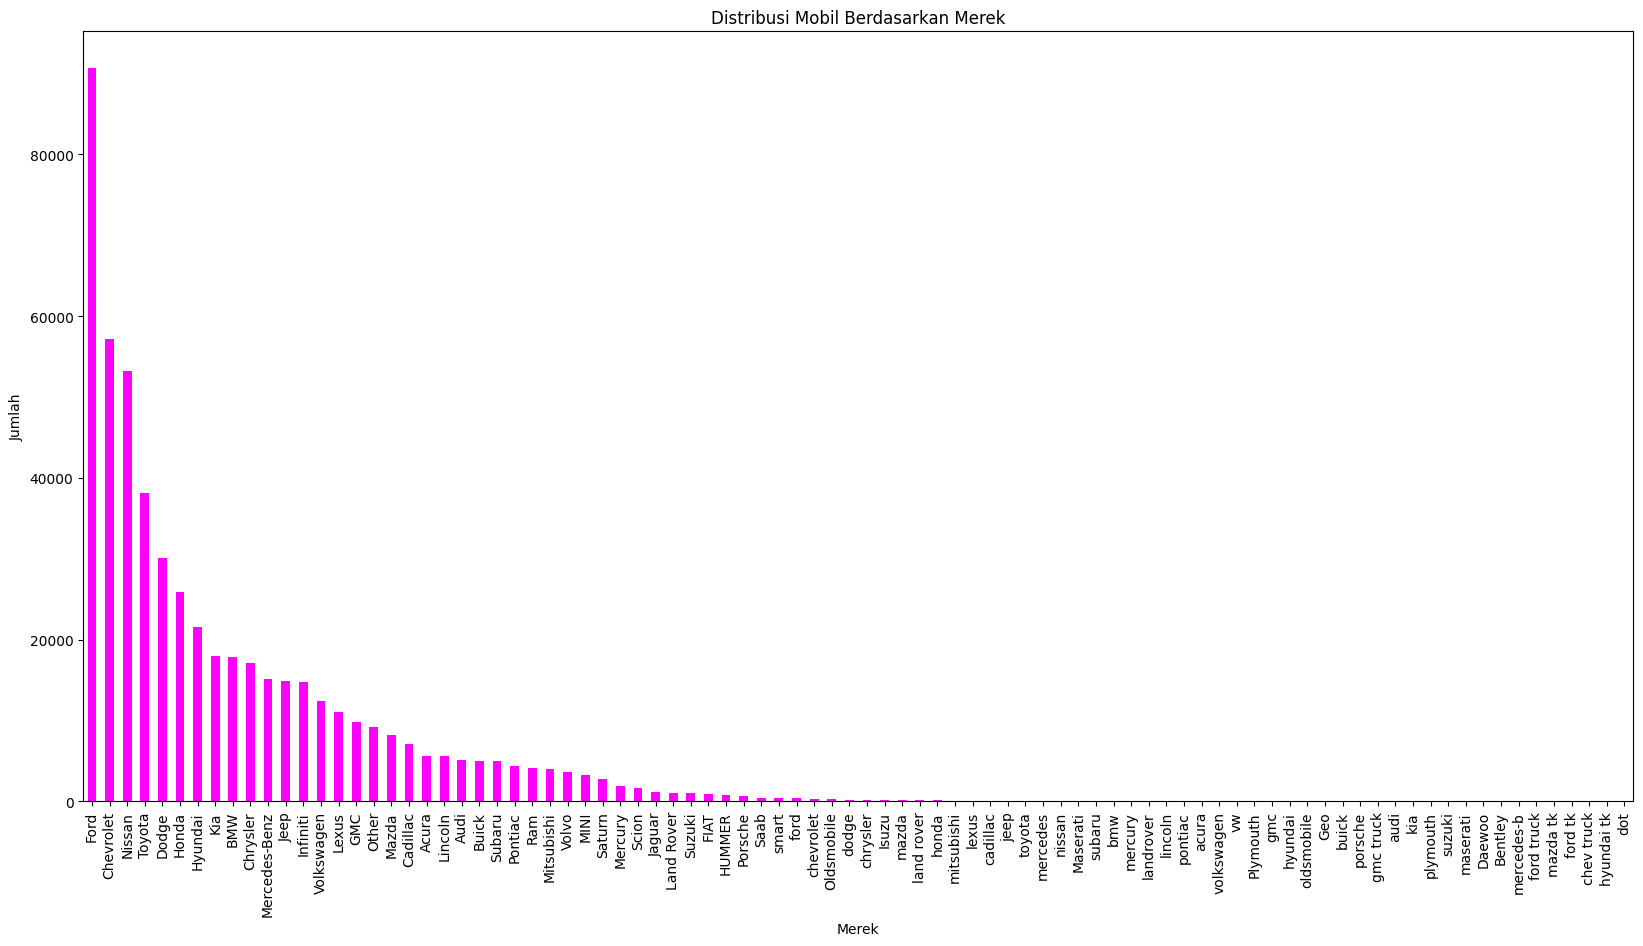

In [30]:
plt.figure(figsize=(20, 10))

df['make'].value_counts().plot(kind='bar', color='magenta')
plt.title('Distribusi Mobil Berdasarkan Merek')
plt.xlabel('Merek')
plt.ylabel('Jumlah')
plt.show()

Distribusi harga jual mobil


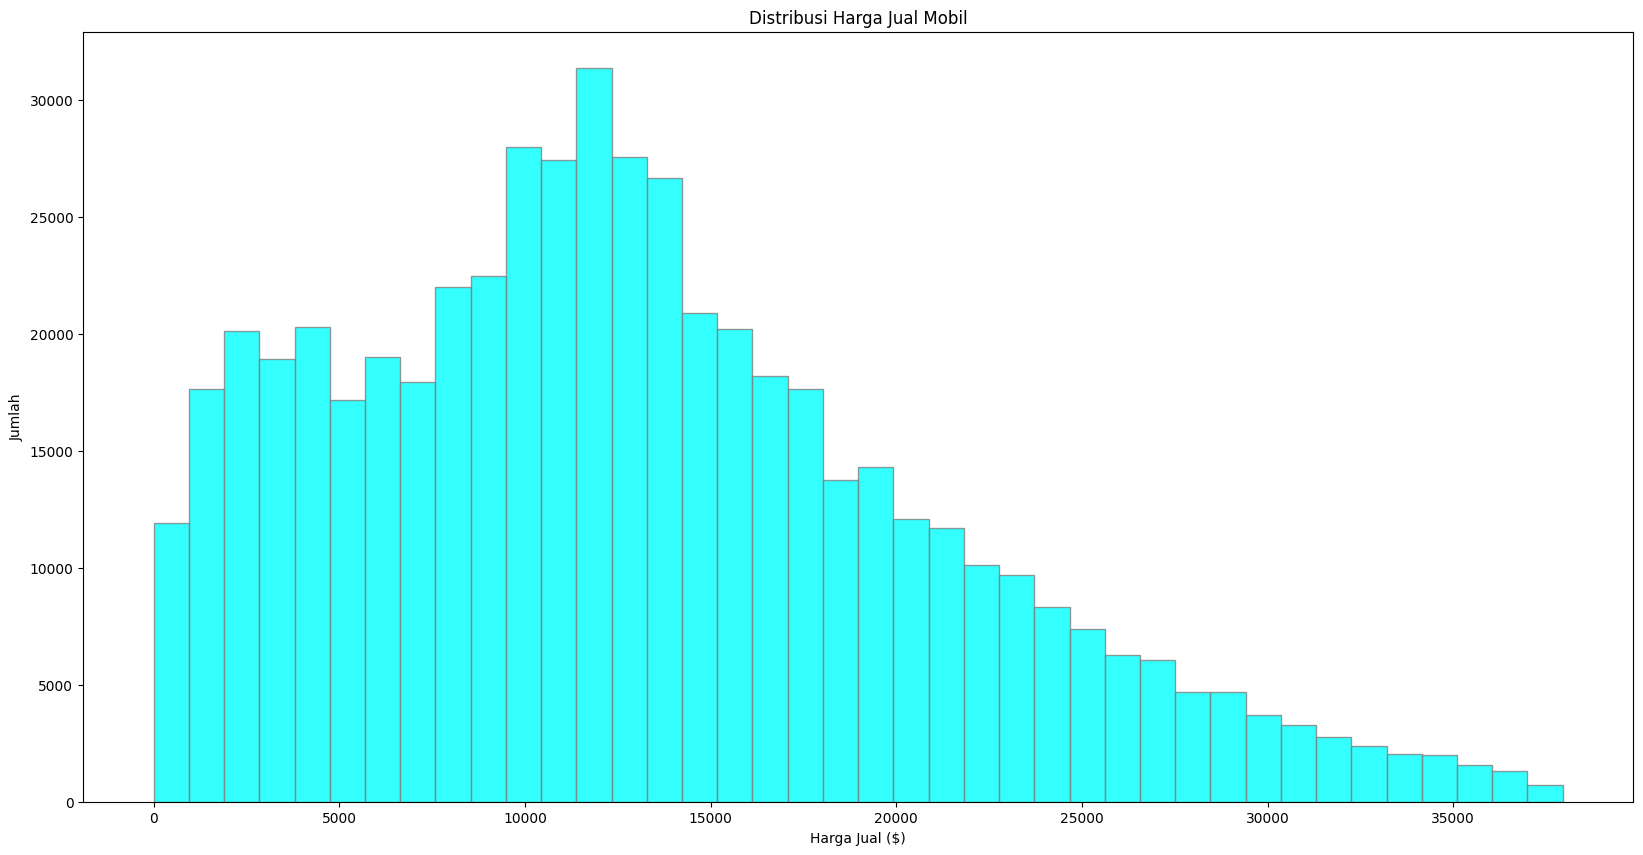

In [31]:
plt.figure(figsize=(20, 10))

plt.hist(df['sellingprice'], alpha=0.8, bins=40, color='cyan', edgecolor='grey')
plt.title('Distribusi Harga Jual Mobil')
plt.xlabel('Harga Jual ($)')
plt.ylabel('Jumlah')
plt.show()

**2. Correlation Matrix**

Matriks korelasi adalah matriks untuk mengetahui koefisien korelasi antar atribut pada data

In [32]:
corr_matrix = df[numeric_columns].dropna().corr()
corr_matrix

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.304472,-0.786131,0.653318,0.638587
condition,0.304472,1.000000,-0.287774,0.286182,0.336134
odometer,-0.786131,-0.287774,1.000000,-0.655649,-0.646952
mmr,0.653318,0.286182,-0.655649,1.000000,0.978421
sellingprice,0.638587,0.336134,-0.646952,0.978421,1.000000


<Axes: >

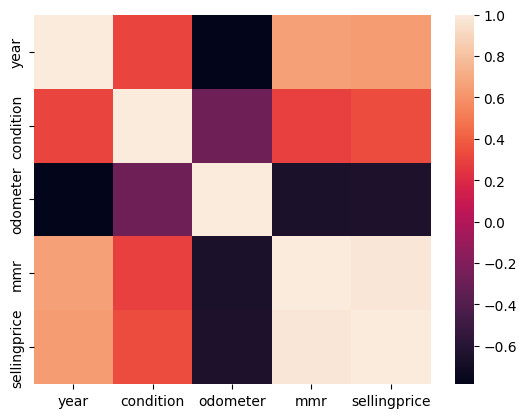

In [33]:
import seaborn as sns

sns.heatmap(corr_matrix)

Beberapa kesimpulan yang dapat diambil dari korelasi matriks diatas adalah
1. 'year' dan 'sellingprice' memiliki korelasi positif yang berarti mobil yang lebih baru memiliki harga yang lebih mahal
2. 'year' dan 'odometer' memiiki korelasi negatif, yang berarti semakin tua mobil, semakin tinggi kilometer yang ditempuh
3. 'mmr' dan 'sellingprice' memiliki korelasi positif yang kuat, yang berarti semakin tinggi MMR, semakin tinggi harga jual

### **K-Means Clustering**

Pada k-means untuk data mobil ini, saya akan mengelompokkan data berdasarkan 3 fitur atau atribut data, yaitu 'condition', 'odometer', dan 'sellingprice'

Maka disini akan dilakukan pemindahan kolom dan ekstraksi kolom

In [34]:
cols = list(df.columns.values)
cols.pop(cols.index('condition'))
df = df[cols+['condition']]

cols = list(df.columns.values)
cols.pop(cols.index('odometer'))
df = df[cols+['odometer']]

cols = list(df.columns.values)
cols.pop(cols.index('sellingprice'))
df = df[cols+['sellingprice']]

df.head()



,year,make,body,state,color,seller,mmr,condition,odometer,sellingprice
0,2015,Kia,SUV,ca,white,kia motors america inc,20500.0,5.0,16639.0,21500.0
1,2015,Kia,SUV,ca,white,kia motors america inc,20800.0,5.0,9393.0,21500.0
2,2014,BMW,Sedan,ca,gray,financial services remarketing (lease),31900.0,45.0,1331.0,30000.0
3,2015,Volvo,Sedan,ca,white,volvo na rep/world omni,27500.0,41.0,14282.0,27750.0
5,2015,Nissan,Sedan,ca,gray,enterprise vehicle exchange / tra / rental / t...,15350.0,1.0,5554.0,10900.0


In [35]:
X = df.iloc[:,7:10].values
X

array([[5.0000e+00, 1.6639e+04, 2.1500e+04],
       [5.0000e+00, 9.3930e+03, 2.1500e+04],
       [4.5000e+01, 1.3310e+03, 3.0000e+04],
       ...,
       [4.8000e+01, 5.0561e+04, 3.4000e+04],
       [3.8000e+01, 1.6658e+04, 1.1100e+04],
       [3.4000e+01, 1.5008e+04, 2.6700e+04]])

In [36]:
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.9699495 , -1.05418269,  1.07476466],
       [-1.9699495 , -1.20982067,  1.07476466],
       [ 1.07516084, -1.38298566,  2.15077601],
       ...,
       [ 1.30354412, -0.32556665,  2.6571343 ],
       [ 0.54226653, -1.05377458, -0.24176689],
       [ 0.2377555 , -1.0892152 ,  1.73303043]])

**Elbow Method**

Elbow method digunakan untuk menemukan cluster paling optimum dengan melihat grafik yang menunjukkan within-cluster-sum-of-square (WCSS) pada sumbu-y, dan jumlah cluster pada sumbu-x

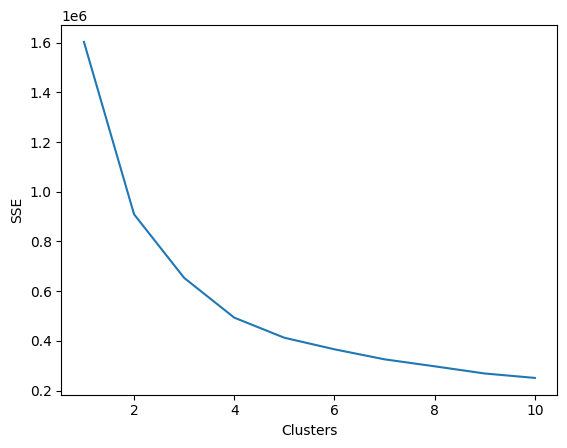

In [37]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(Clus_dataSet)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

Dapat dilihat bahwa cluster yang paling optimal adalah k=4

**K-Means**

In [38]:
k_means = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=20)

labels = k_means.fit_predict(Clus_dataSet)
labels

array([0, 0, 2, ..., 2, 2, 2])

In [39]:
df['cluster'] = labels

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


Visualisasi hasil k-means

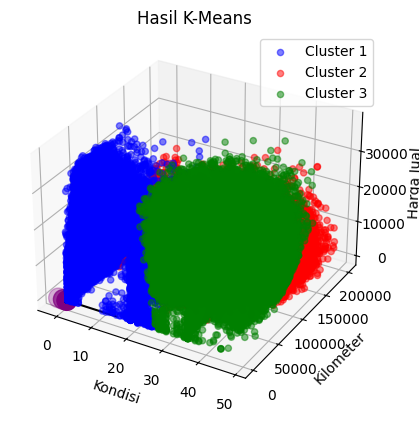

In [41]:
k_means_plot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
k_means_plot.plot3D(xline, yline, zline, 'black')

k_means_plot.scatter3D(df1.condition, df1.odometer, df1.sellingprice,
                       c='blue', label='Cluster 1', alpha=0.5)
k_means_plot.scatter3D(df2.condition, df2.odometer, df2.sellingprice,
                       c='red', label='Cluster 2', alpha=0.5)
k_means_plot.scatter3D(df3.condition, df3.odometer, df3.sellingprice,
                       c='green', label='Cluster 3', alpha=0.5)

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
            color = 'purple', s = 200)
plt.legend()
k_means_plot.set_xlabel('Kondisi')
k_means_plot.set_ylabel('Kilometer')
k_means_plot.set_zlabel('Harga Jual')
plt.title("Hasil K-Means")
plt.show()

Dapat diperhatikan dari hasilnya bahwa jika kita memplotting data pada grafik 3D, data secara visual memang terbagi menjadi 4. Berikut adalah analisis terhadap 4 hasil cluster tersebut:
1. Cluster 1: Kilometer yang telah ditempuh relatif dekat, kondisi baik, harga murah
2. Cluster 2: Kilometer yang telah ditempuh relatif dekat, kondisi relatif baik, harga lebih mahal
3. Cluster 3: Kilometer yang telah ditempuh sudah jauh, semua kondisi, harga relatif murah
4. Cluster 4: Kilometer yang telah ditempuh relatif dekat, kondisi buruk, semua harga